## RL HW 1 - Multi-Armed Bandit with Costs
Niv Cohen Aharon

In [1]:
# !pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
reward_means = [0.8, 0.6, 0.9, 0.4, 0.7]
reward_stds = [0.1, 0.1, 0.1, 0.1, 0.1]
costs = [0.2, 0.1, 0.3, 0.05, 0.15]

def get_reward_and_cost(arm):
    # reward_means = [0.8, 0.6, 0.9, 0.4, 0.7]
    # reward_stds = [0.1, 0.1, 0.1, 0.1, 0.1]
    # costs = [0.2, 0.1, 0.3, 0.05, 0.15]
    reward = np.random.normal(reward_means[arm], reward_stds[arm])
    return reward, costs[arm]

In [4]:
def e_Greedy_with_costs(num_arms, num_steps, epsilon):
    Q = np.zeros(num_arms)        # Estimated net rewards
    N = np.zeros(num_arms)        # Count of selections
    cumulative_net_rewards = []   
    total_net_reward = 0

    for step in range(num_steps):
        if np.random.rand() < epsilon:
            arm = np.random.randint(num_arms)  # Explore
        else:
            arm = np.argmax(Q)                 # Exploit

        reward, cost = get_reward_and_cost(arm)
        net_reward = reward - cost
        N[arm] += 1 # Count how many times visited in that arm
        Q[arm] += (net_reward - Q[arm]) / N[arm]  

        total_net_reward += net_reward
        cumulative_net_rewards.append(total_net_reward)

    return cumulative_net_rewards




In [5]:
def plot_e_greedy_comulative_rewards(cumulative_rewards,title):
    plt.plot(cumulative_rewards)
    plt.xlabel("Steps")
    plt.ylabel("Cumulative Net Reward")
    #plt.title("ε-Greedy Algorithm with Costs")
    plt.title(title)
    plt.grid()
    plt.show()

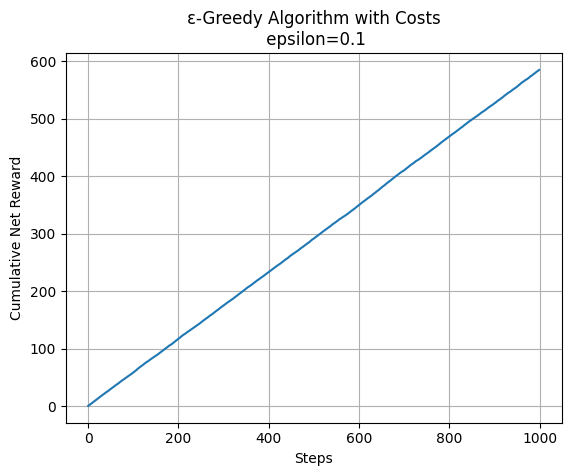

In [6]:
epsilon = 0.1
cumulative_rewards = e_Greedy_with_costs(num_arms=5, num_steps=1000, epsilon=epsilon)

plot_e_greedy_comulative_rewards(cumulative_rewards,f"ε-Greedy Algorithm with Costs\n epsilon={epsilon}")




### 1. Algorithm Design:

Question: 

Explain why we use net rewards (Ri - Ci ) instead of raw rewards (Ri) in this problem.

Answer: 

Because the reward for choosing the best route based on time efficiency is not all what matters in real world application. If the cost for one route is too high, it is not worth to opperate in that way. There should be found a balanced way between time efficiency and cost.

Question: 

How does the ε-greedy algorithm balance exploration and exploitation? What happens if epsilon is too high or too low?

Answer: 

When epsilon is high, there is more exploration, the convergence is slower, but the coverage is better.

when epsilon is low, there is more exploitation, but there is a risk of missing optimal arms.

### 2. Experimentation:

- Run the simulation with different values of epsilon (e.g., 0.01, 0.1, 0.5). How does the choice of 
epsilon affect the cumulative net reward?

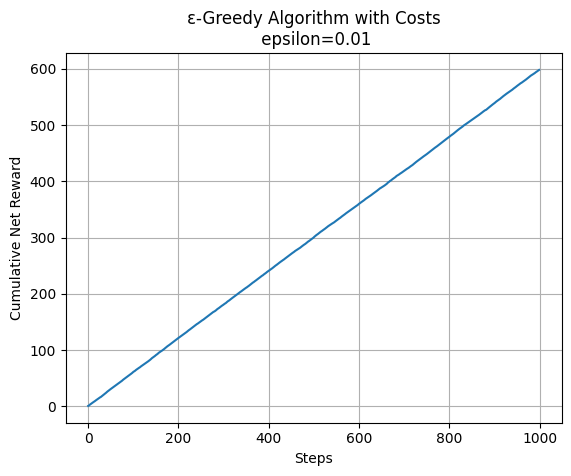

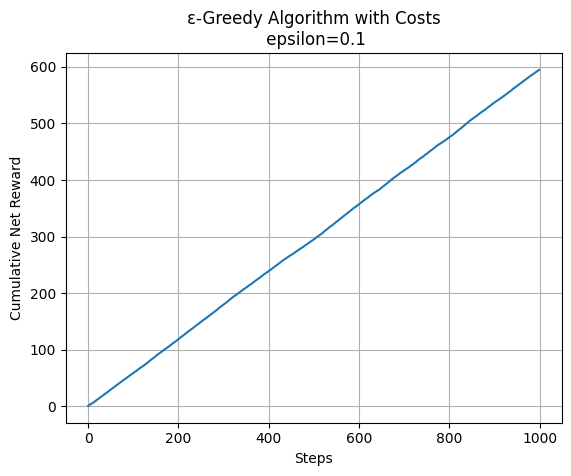

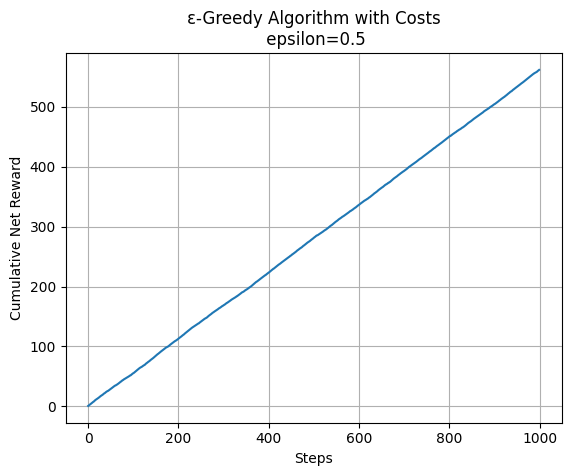

In [7]:
epsilon_array = [0.01, 0.1, 0.5]
for eps in epsilon_array:
    cumulative_rewards = e_Greedy_with_costs(num_arms=5, num_steps=1000, epsilon=eps)
    plot_e_greedy_comulative_rewards(cumulative_rewards,f"ε-Greedy Algorithm with Costs\n epsilon={eps}")



It is possible to see from the graphs results that the for different epsilon values, the cumulative net reward changes. The higher the epsilon, the lower the net reward. This is because when epsilon = 0.5, it explores 50% of the time, meaning, not choosing the best known option, rather trying to find a better option. for a much smaller value, epsilon = 0.01, the algorithm explores 1% of the time, meaning choosing a random arm, while exploiting 99% of the time, choosing the best known arm so far.

- Modify the costs (Ci ) to make one arm significantly more expensive. How does this impact the algorithm's performance?

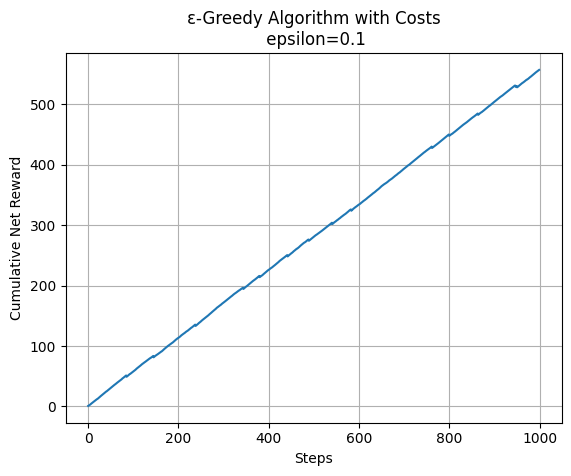

In [8]:
# modified costs
costs = [0.2, 0.1, 3, 0.05, 0.15]

epsilon = 0.1
cumulative_rewards = e_Greedy_with_costs(num_arms=5, num_steps=1000, epsilon=epsilon)
plot_e_greedy_comulative_rewards(cumulative_rewards,f"ε-Greedy Algorithm with Costs\n epsilon={epsilon}")



We can see that by choosing arm number 2 to have a cost of 3 reduced the cumulative net rewaard by about 50 points. It makes sense because arm number 2 have the highest reward, and previously with the original costs, the algorithm probably chose this arm more frequently because the high reward: 0.9 - 0.3 = 0.6. But now after changing the costs, the reward is : 0.9-3 = -2.1. Thus, because of the algorithm  exploration, the arm was probably selected a few times, which contributed to the cumulative net reward in a negative way.

### 3. Comparison

- Non-Stationary Costs: Modify the environment so that the costs (Ci ) change over time. For 
example, let Ci  drift randomly every 100 steps. Update the algorithm to handle this non-stationarity.

- Implement UCB algorithm and compare its performance with ε-greedy. Which algorithm performs better in terms of cumulative net reward?

In [9]:
def drift_costs(costs, step, interval=100, std_dev=0.02):
    if step % interval == 0 and step != 0:
        return [max(0, c + np.random.normal(0, std_dev)) for c in costs]
    return costs  


def e_Greedy_non_stationary_costs(num_arms, num_steps, epsilon):
    Q = np.zeros(num_arms)        # Estimated net rewards
    N = np.zeros(num_arms)        # Count of selections
    cumulative_net_rewards = []   
    total_net_reward = 0
    global costs

    for step in range(num_steps):
        costs = drift_costs(costs, step)

        if np.random.rand() < epsilon:
            arm = np.random.randint(num_arms)  # Explore
        else:
            arm = np.argmax(Q)                 # Exploit

        reward, cost = get_reward_and_cost(arm)
        net_reward = reward - cost
        N[arm] += 1 # Count how many times visited in that arm
        Q[arm] += (net_reward - Q[arm]) / N[arm]  

        total_net_reward += net_reward
        cumulative_net_rewards.append(total_net_reward)

    return cumulative_net_rewards


def ucb_non_stationary_costs(num_arms, num_steps, c_param=2):
    
    Q = np.zeros(num_arms)        # Estimated net rewards
    N = np.zeros(num_arms)        # Count of selections
    cumulative_net_rewards = []
    total_net_reward = 0
    global costs
    

    for step in range(num_steps):
        costs = drift_costs(costs, step)

        ucb_values = np.zeros(num_arms)
        for a in range(num_arms):
            if N[a] == 0:
                ucb_values[a] = float('inf')  # Force try each arm once
            else:
                ucb_values[a] = Q[a] + c_param * np.sqrt(np.log(step + 1) / N[a])

        # Select arm with highest UCB 
        arm = np.argmax(ucb_values)

        reward, cost = get_reward_and_cost(arm)
        net_reward = reward - cost

        N[arm] += 1
        Q[arm] += (net_reward - Q[arm]) / N[arm]

        total_net_reward += net_reward
        cumulative_net_rewards.append(total_net_reward)

    return cumulative_net_rewards

def plot_ucb_vs_e_greedy(eps_result, ucb_result):
    plt.plot(eps_result, label="ε-Greedy")
    plt.plot(ucb_result, label="UCB")
    plt.xlabel("Step")
    plt.ylabel("Cumulative Net Reward")
    plt.title("UCB vs. ε-Greedy with Non-Stationary Costs")
    plt.legend()
    plt.grid()
    plt.show()


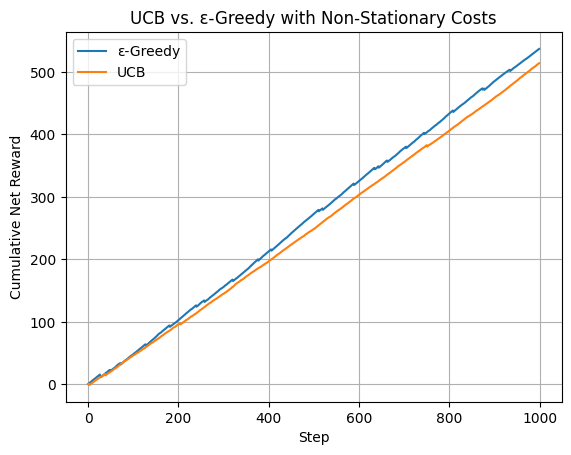

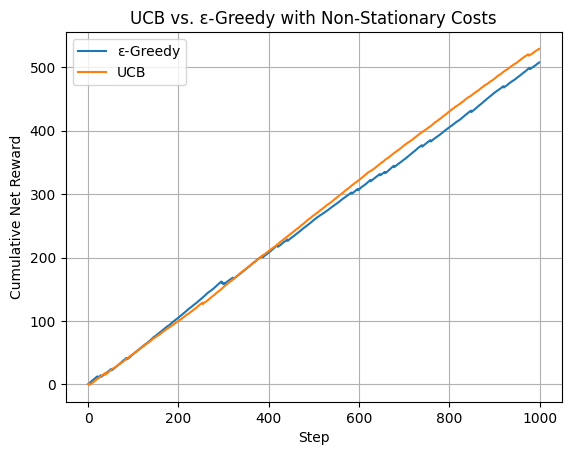

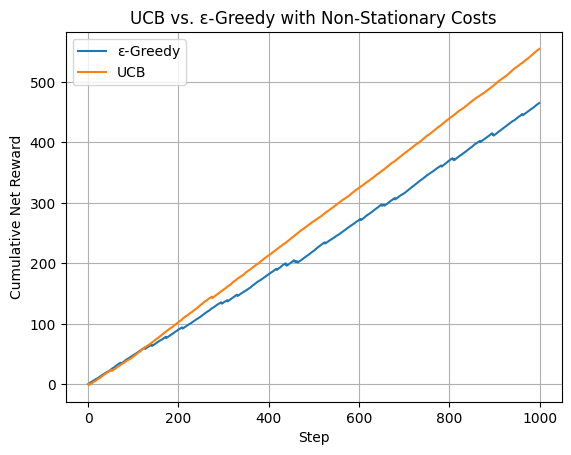

In [10]:
for i in range(3):
    eps_result = e_Greedy_non_stationary_costs(num_arms=5, num_steps=1000, epsilon=0.1)
    ucb_result = ucb_non_stationary_costs(num_arms=5, num_steps=1000, c_param=2)
    plot_ucb_vs_e_greedy(eps_result, ucb_result)



Answer:

It's hard to say which algorithm works better when the costs keep changing, because both of them rely a lot on the cost values. Sometimes one algorithm does better, and in other cases the other one performs better — it really depends on how the costs change over time.

- Dynamic Rewards: Introduce changes in the reward distributions (Ri ) over time. For example, let 
the mean rewards (mui) shift periodically. Analyze how the algorithm adapts to these changes.

In [11]:
def drift_rewards(reward_means, step, interval=100, std_dev=0.02):
    if step % interval == 0 and step != 0:
        return [max(0, r + np.random.normal(0, std_dev)) for r in reward_means]
    return reward_means  


def e_Greedy_non_stationary_rewards(num_arms, num_steps, epsilon):
    Q = np.zeros(num_arms)        # Estimated net rewards
    N = np.zeros(num_arms)        # Count of selections
    cumulative_net_rewards = []   
    total_net_reward = 0
    global reward_means

    for step in range(num_steps):
        reward_means = drift_rewards(reward_means, step)

        if np.random.rand() < epsilon:
            arm = np.random.randint(num_arms)  # Explore
        else:
            arm = np.argmax(Q)                 # Exploit

        reward, cost = get_reward_and_cost(arm)
        net_reward = reward - cost
        N[arm] += 1 # Count how many times visited in that arm
        Q[arm] += (net_reward - Q[arm]) / N[arm]  

        total_net_reward += net_reward
        cumulative_net_rewards.append(total_net_reward)

    return cumulative_net_rewards


def ucb_non_stationary_rewards(num_arms, num_steps, c_param=2):
    
    Q = np.zeros(num_arms)        # Estimated net rewards
    N = np.zeros(num_arms)        # Count of selections
    cumulative_net_rewards = []
    total_net_reward = 0
    global reward_means
    

    for step in range(num_steps):
        reward_means = drift_rewards(reward_means, step)

        ucb_values = np.zeros(num_arms)
        for a in range(num_arms):
            if N[a] == 0:
                ucb_values[a] = float('inf')  # Force try each arm once
            else:
                ucb_values[a] = Q[a] + c_param * np.sqrt(np.log(step + 1) / N[a])

        # Select arm with highest UCB 
        arm = np.argmax(ucb_values)

        reward, cost = get_reward_and_cost(arm)
        net_reward = reward - cost

        N[arm] += 1
        Q[arm] += (net_reward - Q[arm]) / N[arm]

        total_net_reward += net_reward
        cumulative_net_rewards.append(total_net_reward)

    return cumulative_net_rewards




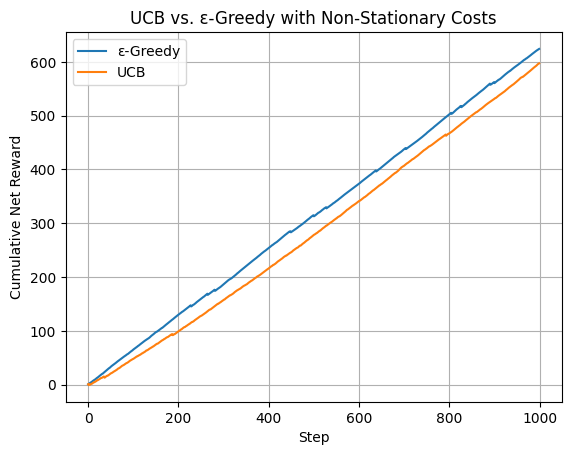

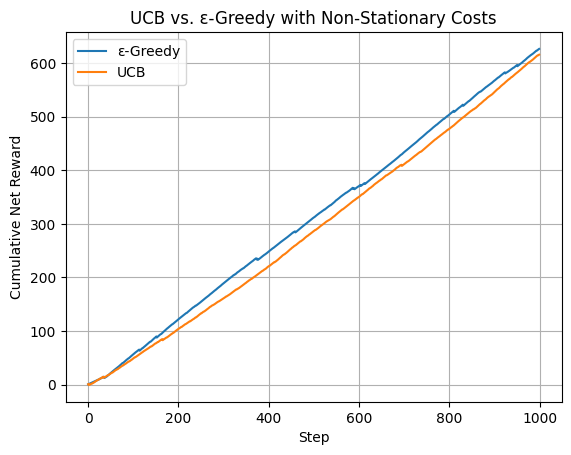

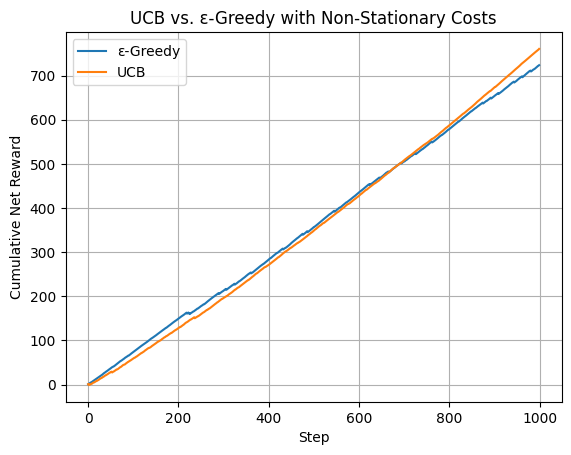

In [12]:
for i in range(3):
    eps_result = e_Greedy_non_stationary_rewards(num_arms=5, num_steps=1000, epsilon=0.1)
    ucb_result = ucb_non_stationary_rewards(num_arms=5, num_steps=1000, c_param=2)
    plot_ucb_vs_e_greedy(eps_result, ucb_result)

When the reward distributions change over time, both algorithms try to adapt, but in different ways. In some runs, ε-greedy performed better, and in others UCB did. This depends on how the reward means changed during the simulation.

Overall, the results show that neither algorithm is always better, their performance depends on the pattern and speed of the reward changes. In some cases, UCB catches up and outperforms ε-greedy, and in others, ε-greedy adapts faster.

### 4. Analysis

- Calculate the regret for the ε-greedy algorithm. Regret is defined as the difference between the cumulative net reward of the optimal arm and the cumulative net reward obtained by the algorithm.

In [13]:
def e_Greedy_with_regret(num_arms, num_steps, epsilon):
    global costs, reward_means

    Q = np.zeros(num_arms)
    N = np.zeros(num_arms)
    cumulative_net_rewards = []
    regrets = []

    total_net_reward = 0

    # --- Precompute best expected net reward (stationary case) ---
    expected_net_rewards = [mu - c for mu, c in zip(reward_means, costs)]
    best_expected_net_reward = max(expected_net_rewards)

    for step in range(num_steps):
        if np.random.rand() < epsilon:
            arm = np.random.randint(num_arms)
        else:
            arm = np.argmax(Q)

        reward, cost = get_reward_and_cost(arm)
        net_reward = reward - cost

        N[arm] += 1
        Q[arm] += (net_reward - Q[arm]) / N[arm]

        total_net_reward += net_reward
        cumulative_net_rewards.append(total_net_reward)

        #  Calculate regret
        optimal_total = best_expected_net_reward * (step + 1)
        regret = optimal_total - total_net_reward
        regrets.append(regret)

    return cumulative_net_rewards, regrets


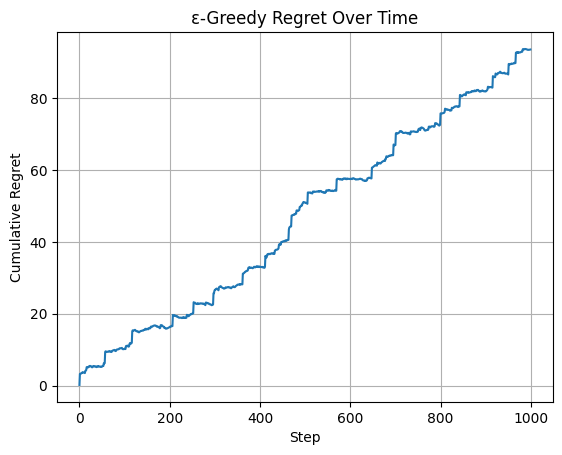

In [14]:
_, regrets = e_Greedy_with_regret(num_arms=5, num_steps=1000, epsilon=0.1)

plt.plot(regrets)
plt.xlabel("Step")
plt.ylabel("Cumulative Regret")
plt.title("ε-Greedy Regret Over Time")
plt.grid()
plt.show()


- Discuss how the regret grows over time. Is the growth linear or sublinear?

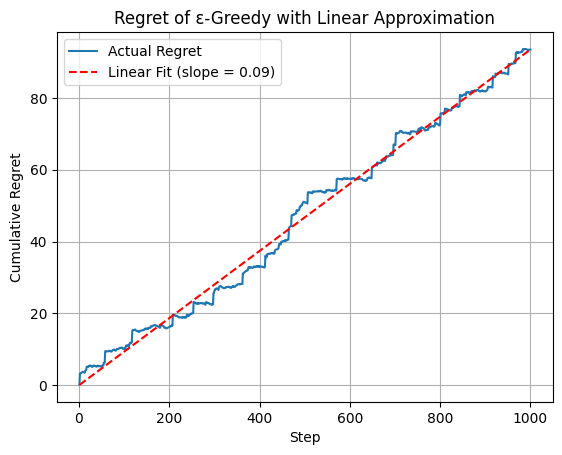

In [15]:

# Fit a line: y = a * x + b
steps = np.arange(1, len(regrets) + 1)
a, b = np.polyfit(steps, regrets, deg=1)
regret_line = a * steps + b

# Plot
plt.plot(steps, regrets, label="Actual Regret")
plt.plot(steps, regret_line, '--', label=f"Linear Fit (slope = {a:.2f})", color='red')
plt.xlabel("Step")
plt.ylabel("Cumulative Regret")
plt.title("Regret of ε-Greedy with Linear Approximation")
plt.legend()
plt.grid()
plt.show()


Answer:

The regret grows approximately linearly over time, as shown by the red dashed line fitted to the actual regret curve. The slope of the linear fit is around 0.07, which means the regret increases steadily at a low rate.

Although the regret curve is not entirly linear, its overall trend closely follows the linear line. This suggests that the ε-greedy algorithm is not fully minimizing regret — it continues to make some suboptimal choices over time due to exploration.
